## Exploratory Data Analysis

#### In this notebook, we will import and process Yelp data (business, user, review) to get a good understanding of our data and its limitations. Here are some things in mind:

- Examine each column within each table and its distribution/counts
- Explore which cities will be used for the project
- Review/rating distribution for the top cities
- Geospatial visualization of business with rating as a color scale
- Check the influence of users and if we should consider as a feature

In [1]:
%matplotlib inline

In [2]:
import os, sys, time
import pandas as pd
import json, csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

In [3]:
# define function to load json files as pandas data frame
def load_json_to_df(datapass):
    t = datetime.now()
    data = []
    with open(datapass, encoding='utf-8') as data_file:
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    print(datetime.now() - t)
    print(df.shape)
    return df

In [4]:
user = load_json_to_df(os.path.abspath("yelp-dataset/yelp_academic_dataset_user.json"))

0:01:13.693645
(1518169, 22)


In [5]:
business = load_json_to_df(os.path.abspath("yelp-dataset/yelp_academic_dataset_business.json"))

0:00:13.292710
(188593, 15)


In [6]:
review = load_json_to_df(os.path.abspath("yelp-dataset/yelp_academic_dataset_review.json"))

0:03:32.981863
(5996996, 9)


In [7]:
# Save the pandas data frame files to csv
user.to_csv('user.csv', index=False)
business.to_csv('business.csv', index=False)
review.to_csv('review.csv', index=False)

In [30]:
print("There are {} users leaving {} reviews for {} businesses in {} cities.".format(user.shape[0], review.shape[0], business.shape[0], business.city.nunique()))

There are 1518169 users leaving 5996996 reviews for 188593 businesses in 1111 cities.


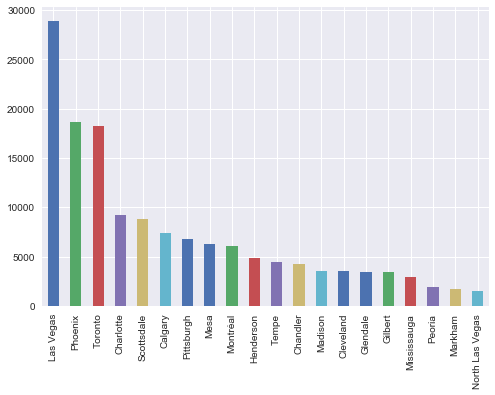

In [31]:
# Top 20 cities by number of business
business.city.value_counts(sort=1)[:20].plot(kind='bar')

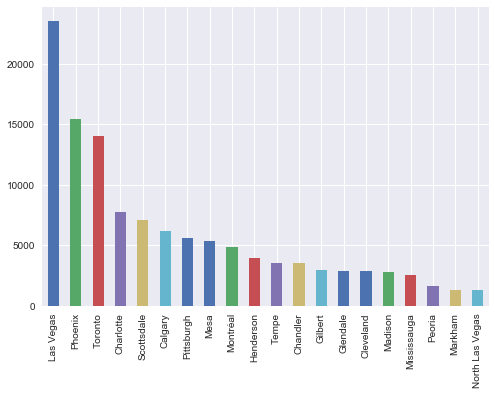

In [33]:
# Top 20 cities by number of businesses that are open
business.city[business.is_open == 1].value_counts(sort=1)[:20].plot(kind='bar')

In [23]:
# Percentage of business counts by city
business.city.value_counts(normalize=True)

Las Vegas                       0.153054
Phoenix                         0.098800
Toronto                         0.096679
Charlotte                       0.048804
Scottsdale                      0.046778
Calgary                         0.039153
Pittsburgh                      0.036078
Mesa                            0.033082
Montréal                        0.032053
Henderson                       0.025531
Tempe                           0.023818
Chandler                        0.022652
Madison                         0.018606
Cleveland                       0.018590
Glendale                        0.018394
Gilbert                         0.018012
Mississauga                     0.015663
Peoria                          0.009905
Markham                         0.009009
North Las Vegas                 0.007996
Champaign                       0.006591
Scarborough                     0.006230
North York                      0.006045
Surprise                        0.005933
Richmond Hill   

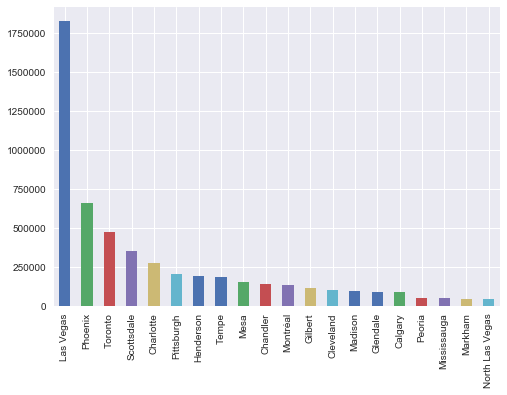

In [54]:
# Top 20 cities by number of reviews
review.city.value_counts(sort=1)[:20].plot(kind='bar')

#### Concatenate columns from business to review dataframe

In [32]:
review['city'] = review['business_id'].map(business.set_index('business_id')['city'])
review['categories'] = review['business_id'].map(business.set_index('business_id')['categories'])
review['is_open'] = review['business_id'].map(business.set_index('business_id')['is_open'])
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,city,categories,is_open
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Pizza, Restaurants",1
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Restaurants, Mexican, Bars, Nightlife",1
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"American (New), Barbeque, Restaurants",1
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Restaurants, Thai",1
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Restaurants, Desserts, Asian Fusion, Mexican, ...",0
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Bars, Nightlife, Dive Bars",0
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Thai, Restaurants, Barbeque",0
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1,kUZWBVZvhWuC8TWUg5AYyA,5,AMAZING!!!\n\n I was referred here by a friend...,0,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Asian Fusion, Korean, Restaurants, Mexican",1
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\n2 hour wait time= not so amazi...,0,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Barbeque, Bars, Pubs, American (Traditional), ...",1
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2,LWUtqzNthMM3vpWZIFBlPw,2,"Food is pretty good, not gonna lie. BUT you ha...",1,msQe1u7Z_XuqjGoqhB0J5g,Las Vegas,"Restaurants, Diners, Burgers, Breakfast & Brunch",1


#### User overlaps across the top cities.

In [50]:
len(set(review.user_id[review.city == 'Las Vegas']).intersection(review.user_id[review.city == 'Phoenix']))

23505

In [52]:
len(set(review.user_id[review.city == 'Las Vegas']).intersection(review.user_id[review.city == 'Scottsdale']))

15751

In [51]:
len(set(review.user_id[review.city == 'Las Vegas']).intersection(review.user_id[review.city == 'Charlotte']))

5597

In [40]:
len(set(review.user_id[review.city == 'Las Vegas']).intersection(review.user_id[review.city == 'Toronto']))

5335

In [41]:
len(set(review.user_id[review.city == 'Phoenix']).intersection(review.user_id[review.city == 'Toronto']))

1497

In [53]:
len(set(review.user_id[review.city == 'Calgary']).intersection(review.user_id[review.city == 'Toronto']))

1635

It turns out Las Vegas should be the city to focus our project on, considering limitations in other city. We can use Las Vegas and Phoenix as it has the most users who overlap.

Some exploratory data analysis on Las Vegas, where the Yelp dataset has the most business, reviews, and users who have left reviews.

#### Examine the 'categories' column from business dataset

In [117]:
# Given categories of businesses in Las Vegas
business[business.city == 'Las Vegas'].groupby('categories')['business_id'].nunique()

categories
ATV Rentals/Tours, Active Life                                                                                                                                                                                                                                                                                            2
ATV Rentals/Tours, Car Rental, Tours, Hotels & Travel, Motorcycle Rental, Historical Tours, Active Life                                                                                                                                                                                                                   1
ATV Rentals/Tours, Hotels & Travel, Active Life, Food Tours, Tours                                                                                                                                                                                                                                                        1
ATV Rentals/Tours, Motorcycle Rental, Act

Considering the additive nature of values in 'categories', we will need to develop our own categories values that are more interpretable and useful.

#### Stars and review counts in the top cities

In [71]:
pd.crosstab(index=review.stars, columns=review.city[review.city.isin(['Las Vegas', 'Phoenix', 'Toronto', 'Charlotte', 'Scottsdale'])])

city,Charlotte,Las Vegas,Phoenix,Scottsdale,Toronto
stars,,,,,
1,37196,261996,101706,45140,52397
2,23722,142187,48091,25369,47361
3,33967,200227,58751,31180,80264
4,69197,384154,128564,67632,146211
5,109756,836769,323891,181837,148570


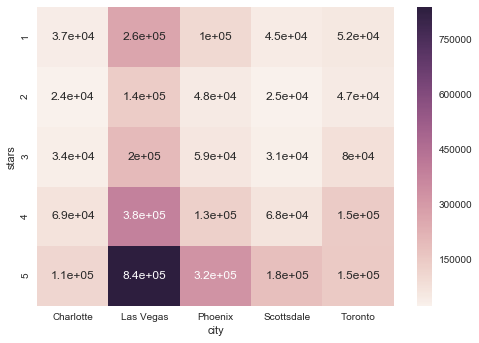

In [72]:
# Heatmap of Top 5 city and stars
citystar = pd.crosstab(index=review.stars, columns=review.city[review.city.isin(['Las Vegas', 'Phoenix', 'Toronto', 'Charlotte', 'Scottsdale'])])
sns.heatmap(data=citystar, annot=True)

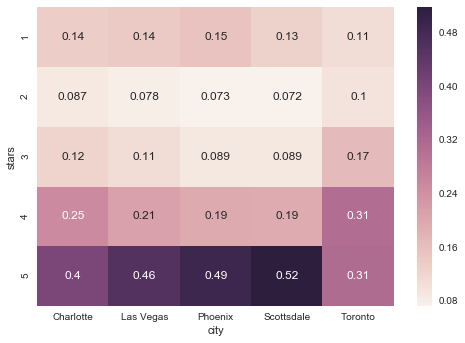

In [70]:
# Heatmap of Top 5 city and stars - NORMALIZED at CITY
citystar = pd.crosstab(index=review.stars, columns=review.city[review.city.isin(['Las Vegas', 'Phoenix', 'Toronto', 'Charlotte', 'Scottsdale'])], normalize='columns')
sns.heatmap(data=citystar, annot=True)

In all cities there are generally more 5-star ratinngs and less 2-star and 3-star ratings.

C:\Users\mm4me\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


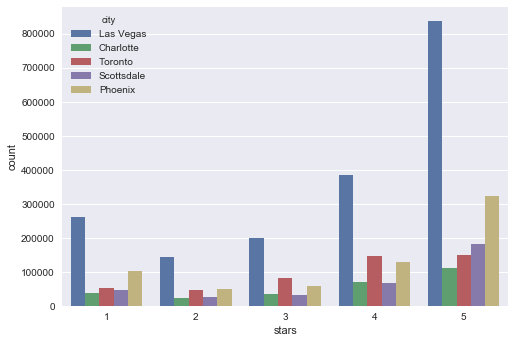

In [84]:
sns.countplot(x='stars', hue='city', data=review[review.city.isin(['Las Vegas', 'Phoenix', 'Toronto', 'Charlotte', 'Scottsdale'])])

In [93]:
# Top 5 city table
review_top5 = review[review.city.isin(['Las Vegas', 'Phoenix', 'Toronto', 'Charlotte', 'Scottsdale'])]
summary_city = review_top5.groupby('city').agg({'business_id': 'nunique', 'user_id': 'nunique', 'review_id': 'nunique', 'stars': 'sum'})
summary_city.sort_values('business_id')

,business_id,user_id,review_id,stars
city,,,,
Scottsdale,8822,145224,351158,1369131
Charlotte,9204,86443,273838,1012109
Toronto,18233,103262,474803,1715605
Phoenix,18633,237700,661003,2507852
Las Vegas,28865,579005,1825333,6867512


In [95]:
# Add more columns and sort
summary_city['avg review per business'] = summary_city.review_id/summary_city.business_id
summary_city['avg review per user'] = summary_city.review_id/summary_city.user_id
summary_city['avg star'] = summary_city.stars/summary_city.review_id
summary_city.sort_values('business_id', ascending=False)

,business_id,user_id,review_id,stars,avg review per business,avg review per user,avg star
city,,,,,,,
Las Vegas,28865,579005,1825333,6867512,63.236896,3.152534,3.762334
Phoenix,18633,237700,661003,2507852,35.474856,2.780829,3.794010
Toronto,18233,103262,474803,1715605,26.040860,4.598042,3.613299
Charlotte,9204,86443,273838,1012109,29.752064,3.167845,3.696014
Scottsdale,8822,145224,351158,1369131,39.804806,2.418044,3.898903


#### Examining user data

In [98]:
user.review_count.describe()

count    1.518169e+06
mean     2.243219e+01
std      7.750849e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.272300e+04
Name: review_count, dtype: float64

In [96]:
np.histogram(user.review_count)

(array([1517479,     624,      41,      15,       3,       2,       1,
              2,       0,       2], dtype=int64),
 array([    0. ,  1272.3,  2544.6,  3816.9,  5089.2,  6361.5,  7633.8,
         8906.1, 10178.4, 11450.7, 12723. ]))

In [105]:
user[user.review_count > 5000]

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
612296,3.84,153,6,153,90,7,19,128,9,165,...,2,"2014, 2018, 2016, 2013, 2017, 2015, 2012",238,"wPfO0bhqtn-20K79nUICTA, ON5mVLjRjBlhCH-GBcdLpw...",58,Shila,11942,150,RtGqdDBvvBCjcu5dUqwfzA,2010-10-17
912339,3.82,4701,101,4701,2772,38,347,1656,1833,3772,...,46517,"2017, 2014, 2016, 2015, 2018",1311,"kWhA1UAxGT7Qj4eE0_dM7g, 13qoiuYVB0wpTm5B2KRrrA...",46720,Fox,6321,46800,Hi10sGSZNxQH3NLyWSZ1oA,2009-05-26
913550,3.93,3638,113,3638,2110,233,184,1030,338,6679,...,3848,"2017, 2009, 2012, 2010, 2008, 2015, 2018, 2016...",404,"9PF9t1FY1gq2JxeecJ-HrA, l_eDRCfkLcaiZzl2T9qJdA...",3877,Eric,5370,3906,HFECrzYDpgbS5EmTBtj2zQ,2007-03-28
1065202,3.80,1154,47,1154,828,34,125,489,185,1051,...,14,"2006, 2009, 2017, 2008, 2018, 2011, 2010, 2012...",725,"Y78xL2sadoZKiQ1ZH0XUjw, lX4o3lRcp-MjLWpK9O3GSg...",11,Kim,9811,19,P5bUL3Engv-2z6kKohB6qQ,2006-05-31
1117323,3.49,98,4,98,36,14,23,137,78,220,...,160,"2011, 2012, 2010",278,"d9KVQtr4S2nTVHWosST7GA, LNPyE5X1K5B_flcTCH9StQ...",185,George,7755,172,8RcEwGrFIgkt9WQ35E6SnQ,2009-11-06
1125436,3.60,2193,21,2193,1564,56,411,800,940,2581,...,22284,"2010, 2017, 2011, 2013, 2018, 2016, 2012, 2014...",479,"dsu43n2DOR_pB07P1sOOZg, RLE3eudTgzSpiUUNGy8q2w...",22142,Bruce,9278,25881,hWDybu_KvYLSdEFzGrniTw,2009-03-08
1132307,3.28,3036,54,3036,2012,84,218,1847,57,3400,...,13671,"2011, 2012, 2015, 2010, 2014, 2009, 2018, 2013...",1051,"gTh0y69o0AAFCnf43PfX1w, bQDnkRvMYZc8cSegCTbNeg...",4100,Victor,12723,18100,8k3aO-mPeyhbR5HUucA5aA,2007-12-08
1143354,3.32,298,2,298,92,1,39,211,95,502,...,1236,None,254,"f6DTdvlq0JYdSpxyUTpz7g, chXBCXPMFR7YQEWKY36mkQ...",1211,Kenneth,6719,1515,Xwnf20FKuikiHcSpcEbpKQ,2011-06-10
1366811,3.70,641,17,641,266,6,62,303,478,699,...,60,"2016, 2014, 2012, 2013, 2017, 2018, 2015",695,"coKnuxLznH0FHb34m4ZLCw, 4x3x0oGs9gcHCoQpqoI9hw...",70,Nijole,6863,41,nmdkHL2JKFx55T3nq5VziA,2011-11-29
1399461,3.31,1549,65,1549,686,92,188,1280,1335,3553,...,1099,"2015, 2012, 2010, 2018, 2009, 2014, 2013, 2011...",684,"7SmEWHH-f7tYmRAwEBSceA, s8gK7sdVzJcYKcPv2dkZXw...",2232,Jennifer,6082,1381,CxDOIDnH8gp9KXzpBHJYXw,2009-11-09


(array([995687., 210020.,  91100.,  50846.,  32233.,  22501.,  16500.,
         12523.,  10057.,   8065.,   6959.,   5910.,   5074.,   4247.,
          3733.,   3356.,   2954.,   2708.,   2348.,   2141.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 20 Patch objects>)

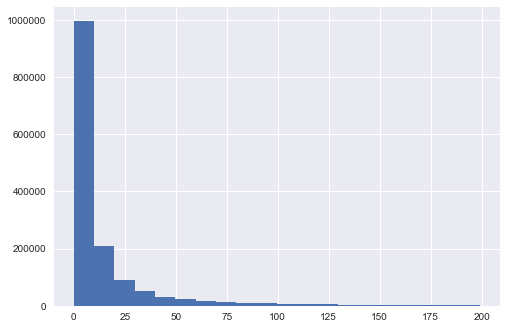

In [115]:
plt.hist(user.review_count[user.review_count < 200], bins=20)

(array([2.6852e+04, 1.6460e+03, 3.2800e+02, 9.0000e+01, 2.4000e+01,
        1.0000e+01, 1.0000e+01, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  201. ,   827.1,  1453.2,  2079.3,  2705.4,  3331.5,  3957.6,
         4583.7,  5209.8,  5835.9,  6462. ,  7088.1,  7714.2,  8340.3,
         8966.4,  9592.5, 10218.6, 10844.7, 11470.8, 12096.9, 12723. ]),
 <a list of 20 Patch objects>)

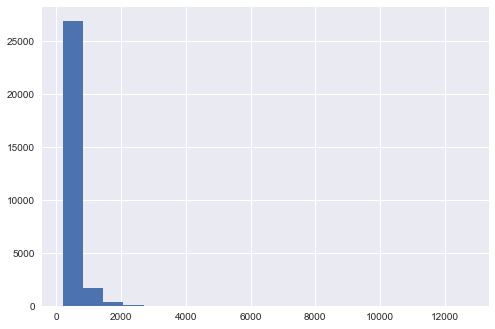

In [116]:
plt.hist(user.review_count[user.review_count > 200], bins=20)

#### Plot business locations using latitude and logitude, color scaled by star

In [82]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [119]:
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [120]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [123]:
import nltk
from nltk.corpus import stopwords

In [159]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [125]:
lasvegas_5 = nltk.pos_tag(word_tokenize(" ".join([i for i in review.text[(review.city == 'Las Vegas') & (review.stars == 5)]])))

lasvegas_5_wordcloud = WordCloud(background_color="white", max_words=100).generate(" ".join([word for (word, tag) in lasvegas_5 if tag == 'JJ']))

plt.imshow(lasvegas_5_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

%time

KeyboardInterrupt: 

In [127]:
review[(review.city == 'Las Vegas') & (review.stars == 5) & (review.is_open == 1)].shape

(749042, 12)

In [128]:
review[(review.city == 'Las Vegas') & (review.stars == 1) & (review.is_open == 1)].shape

(229053, 12)

In [130]:
lasvegas_1 = " ".join(review.text[(review.city == 'Las Vegas') & (review.stars == 1) & (review.is_open == 1)])

In [133]:
len(lasvegas_1)

174329310

In [151]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
#lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([i for i in stop_free if i not in exclude])
    num_free = "".join([i for i in punc_free if not i.isdigit()])
    #normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return num_free

In [146]:
len(clean(lasvegas_1))

105650113

In [142]:
lasvegas_1_clean = clean(lasvegas_1)

In [144]:
print(lasvegas_1_clean[:50])

terrible dry corn bread rib tips fat mushy flavor 


In [152]:
from nltk.tag.perceptron import PerceptronTagger

In [153]:
tagger = PerceptronTagger()
lasvegas_1 = tagger.tag(word_tokenize(lasvegas_1_clean))

In [155]:
str(lasvegas_1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


(-0.5, 399.5, 199.5, -0.5)

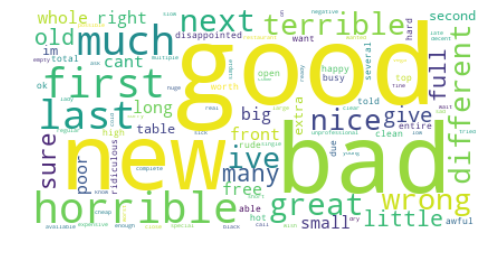

In [160]:
wordcloud = WordCloud(background_color="white", max_words=100).generate(" ".join([word for (word, tag) in lasvegas_1 if tag == 'JJ']))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [162]:
lasvegas_5 = tagger.tag(word_tokenize(clean(" ".join(review.text[(review.city == "Las Vegas") & (review.stars == 5) & (review.is_open == 1)]))))

(-0.5, 399.5, 199.5, -0.5)

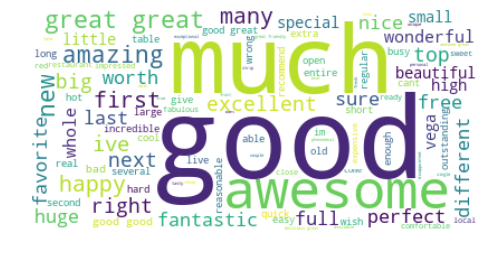

In [163]:
wordcloud_5 = WordCloud(background_color="white", max_words=100).generate(" ".join([word for (word, tag) in lasvegas_5 if tag == 'JJ']))
plt.imshow(wordcloud_5, interpolation="bilinear")
plt.axis("off")

In [ ]:
phoenix_5 = tagger.tag(word_tokenize(clean(" ".join(review.text[(review.city == "Phoenix") & (review.stars == 5) & (review.is_open == 1)]))))
wc_phoenix_5 = WordCloud(background_color="white", max_words=100).generate(" ".join([word for (word, tag) in phoenix_5 if tag == 'JJ']))

(-0.5, 399.5, 199.5, -0.5)

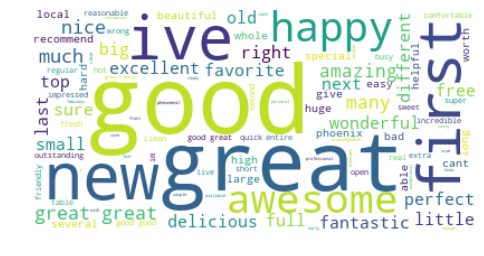

In [179]:
plt.imshow(wc_phoenix_5, interpolation="bilinear")
plt.axis("off")

In [174]:
tagger = PerceptronTagger()
def wordcloud_city_star_pos(city, star, pos, wordcount):
    t = datetime.now()
    text = " ".join([i for i in review.text[(review.city == city) & (review.stars == star) & (review.is_open == 1)]])
    pos_tag = tagger.tag(word_tokenize(clean(text)))
    wordcloud = WordCloud(background_color="white", max_words=wordcount).generate(" ".join([word for (word, tag) in pos_tag if tag == pos]))
    print(datetime.now() - t)
    return worldcloud

In [176]:
def wordcloud_city_pos(city, pos, wordcount):
    t = datetime.now()
    text = " ".join([i for i in review.text[(review.city == city) & (review.is_open == 1)]])
    pos_tag = tagger.tag(word_tokenize(clean(text)))
    wordcloud = WordCloud(background_color="white", max_words=wordcount).generate(" ".join([word for (word, tag) in pos_tag if tag == pos]))
    print(datetime.now() - t)
    return wordcloud

In [177]:
wordcloud_pheonix = wordcloud_city_star_pos("Phoenix", 5, "JJ", 100)

0:17:09.008907


NameError: name 'worldcloud' is not defined

C:\Users\mm4me\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


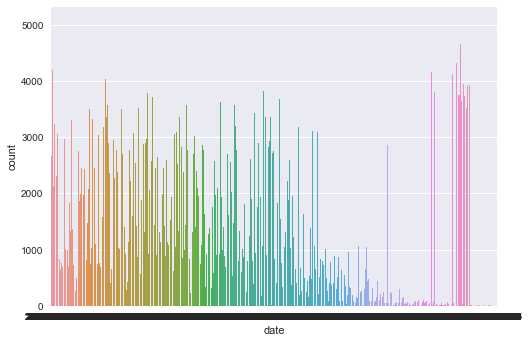

In [173]:
sns.countplot(x="date", data=review)

In [ ]:
g = sns.